# Explore reasons for delay

In [2]:
dataset_meta = DatasetMeta(SchemaName.FLIGHTS, FlightsDatasetName.DATASET2)
dataset = Dataset(dataset_meta)
dataset_df = dataset.load_data()

dataset_df.head()

,flight_id,airline,origin_airport,destination_airport,flight_number,delay_reason,departure_delay,scheduled_trip_time,scheduled_departure,scheduled_arrival,day_of_week,day_of_month,month
65,65,NK,BOS,MYR,103,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,4,1,1
71,71,AA,BOS,MIA,2454,None,ON_TIME,LONG_FLIGHT,NIGHT,MORNING,4,1,1
104,104,B6,BOS,BWI,727,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,4,1,1
108,108,DL,BOS,DTW,2079,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,4,1,1
121,121,B6,BOS,PBI,721,None,ON_TIME,LONG_FLIGHT,NIGHT,MORNING,4,1,1


In [3]:
actions_lst = [
    GroupAction(grouped_column=Column('delay_reason'), aggregated_column=Column('flight_id'),
            aggregation_function=AggregationFunction.COUNT),
    BackAction(),
    GroupAction(grouped_column=Column('airline'), aggregated_column=Column('flight_id'),
            aggregation_function=AggregationFunction.COUNT),
    FilterAction(filtered_column=Column('delay_reason'), filter_operator=FilterOperator.EQUAL,
                 filter_term='AIRLINE'),
    BackAction(),
    FilterAction(filtered_column=Column('delay_reason'), filter_operator=FilterOperator.EQUAL,
                 filter_term='LATE_AIRCRAFT'),
    BackAction(),
    BackAction(),
    FilterAction(filtered_column=Column('delay_reason'), filter_operator=FilterOperator.EQUAL,
                 filter_term='SECURITY'),
    BackAction(),
    FilterAction(filtered_column=Column('delay_reason'), filter_operator=FilterOperator.EQUAL,
             filter_term='WEATHER'),
    GroupAction(grouped_column=Column('scheduled_departure'), aggregated_column=Column('flight_id'),
            aggregation_function=AggregationFunction.COUNT),
    GroupAction(grouped_column=Column('scheduled_arrival'), aggregated_column=Column('flight_id'),
            aggregation_function=AggregationFunction.COUNT)
    ]
    
actions_simulator = ActionsSimulator(dataset=dataset)
action_execution_result_lst = actions_simulator.run_actions(actions_lst)

### Session Tree:

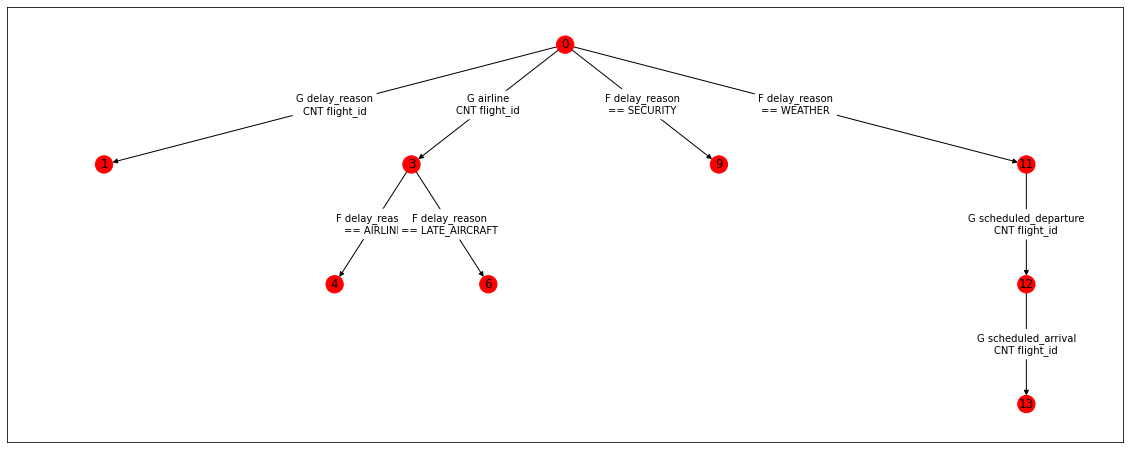

In [4]:
draw_nx_display_tree(action_execution_result_lst)

### Query 1: <span style="color:blue;">Group by delay_reason CNT(flight_id)</span>

In [5]:
display(prepare_display(action_execution_result_lst, 0))

,flight_id
delay_reason,
None,6233
AIR_SYSTEM,908
LATE_AIRCRAFT,485
AIRLINE,449
WEATHER,96
SECURITY,1


### Query 3: <span style="color:blue;">Group by airline CNT(flight_id)</span>

In [6]:
display(prepare_display(action_execution_result_lst, 2))

,flight_id
airline,
B6,3030
US,1270
DL,1186
AA,810
WN,671
UA,667
EV,168
VX,120
NK,118


### Query 4: <span style="color:DimGray">Group by airline CNT(flight_id) AND</span> <span style="color:blue;">Filter delay_reason == AIRLINE</span>

In [7]:
display(prepare_display(action_execution_result_lst, 3))

,flight_id
airline,
B6,235
US,49
DL,39
UA,38
AA,29
WN,28
AS,10
VX,10
EV,6


### Query 6: <span style="color:DimGray">Group by airline CNT(flight_id) AND</span> <span style="color:blue;">Filter delay_reason == LATE_AIRCRAFT</span>

In [8]:
display(prepare_display(action_execution_result_lst, 5))

,flight_id
airline,
B6,152
DL,76
AA,72
WN,59
US,48
UA,39
EV,15
AS,10
NK,5


### Query 9: <span style="color:blue;">Filter delay_reason == SECURITY</span>

In [9]:
display(prepare_display(action_execution_result_lst, 8))

,flight_id,airline,origin_airport,destination_airport,flight_number,delay_reason,departure_delay,scheduled_trip_time,scheduled_departure,scheduled_arrival,day_of_week,day_of_month,month
227848,227848,B6,BOS,PHX,603,SECURITY,SMALL_DELAY,LONG_FLIGHT,AFTERNOON,EVENING,4,15,8


### Query 11: <span style="color:blue;">Filter delay_reason == WEATHER</span>

In [10]:
display(prepare_display(action_execution_result_lst, 10))

,flight_id,airline,origin_airport,destination_airport,flight_number,delay_reason,departure_delay,scheduled_trip_time,scheduled_departure,scheduled_arrival,day_of_week,day_of_month,month
11656,11656,VX,BOS,SFO,357,WEATHER,ON_TIME,LONG_FLIGHT,EVENING,EVENING,4,1,1
42482,42482,DL,BOS,JFK,793,WEATHER,LARGE_DELAY,SHORT_FLIGHT,AFTERNOON,EVENING,6,3,7
42983,42983,DL,BOS,MSP,2549,WEATHER,LARGE_DELAY,LONG_FLIGHT,EVENING,EVENING,6,3,7
43216,43216,DL,BOS,CVG,62,WEATHER,MID_DELAY,MID_FLIGHT,EVENING,EVENING,6,3,7
43280,43280,DL,BOS,DTW,1119,WEATHER,SMALL_DELAY,MID_FLIGHT,EVENING,EVENING,6,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
459442,459442,B6,BOS,MCO,51,WEATHER,SMALL_DELAY,LONG_FLIGHT,MORNING,MORNING,6,31,2
460500,460500,B6,BOS,DCA,389,WEATHER,SMALL_DELAY,MID_FLIGHT,MORNING,MORNING,6,31,2
460918,460918,DL,BOS,LAX,2531,WEATHER,MID_DELAY,LONG_FLIGHT,MORNING,AFTERNOON,6,31,2
461476,461476,DL,BOS,JFK,1849,WEATHER,SMALL_DELAY,SHORT_FLIGHT,MORNING,MORNING,6,31,2


### Query 12: <span style="color:DimGray">Filter delay_reason == WEATHER AND</span> <span style="color:blue;">Group by scheduled_departure CNT(flight_id)</span>

In [11]:
display(prepare_display(action_execution_result_lst, 11))

,flight_id
scheduled_departure,
AFTERNOON,37
EVENING,32
MORNING,26
NIGHT,1


### Query 13: <span style="color:DimGray">Filter delay_reason == WEATHER AND Group by scheduled_departure CNT(flight_id) AND</span> <span style="color:blue;">Group by scheduled_arrival CNT(flight_id)</span>

In [12]:
display(prepare_display(action_execution_result_lst, 12))

flight_id
scheduled_departure scheduled_arrival           
NIGHT               MORNING                    1
MORNING             MORNING                   15
                    AFTERNOON                 11
EVENING             EVENING                   28
                    NIGHT                      4
AFTERNOON           EVENING                   21
                    AFTERNOON                 16